# This script is to look at 4D vars available in the 3hr data
* Check if UHI decreases with height
* Plot height it gets to zero as a function of time (likely seasonal)
* Unsure if there is possibility of inversion

In [1]:
import osmnx as ox
import geopandas as gpd 
from geopy.distance import geodesic
import intake
from easygems import healpix as egh
import healpy as hp
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from cartopy.io import shapereader as shpreader
from cartopy.feature import ShapelyFeature
from shapely.geometry import MultiPolygon, Polygon, Point
import xarray as xr
from pathlib import Path
from rasterio import features
import os

# import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cf
states_provinces = cf.NaturalEarthFeature(
               category='cultural',
               name='admin_1_states_provinces_lines',
               scale='50m',
               facecolor='none')


In [2]:
import xarray as xr
from pathlib import Path


In [3]:
plot_path='/home/561/dc5055/WCRP_HK25/Plots'

## Getting landmask
* sftlf only available for zoom 9 or higher?

In [9]:
zoom_tmp='7'
data_tmp = "/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT1H.z" + zoom_tmp +".zarr" #PT1H is hourly data
ds_tmp = xr.open_zarr(data_tmp)
ds_tmp

<xarray.Dataset> Size: 198GB
Dimensions:  (cell: 196608, time: 10489)
Coordinates:
  * cell     (cell) int64 2MB 0 1 2 3 4 5 ... 196603 196604 196605 196606 196607
    crs      float64 8B ...
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01
Data variables: (12/24)
    clivi    (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    clt      (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    clwvi    (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    hflsd    (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    hfssd    (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    huss     (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    ...       ...
    rsut     (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    rsutcs   (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    tas      (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    ts       (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    uas      (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
    vas      (time, cell) float32 8GB dask.array<chunksize=(64, 16384), meta=np.ndarray>
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n2560_RAL3p3
    simulation_description:           The MetUM uses a regular lat-lon grid, ...

In [4]:
zoom_lev = '9'
# file = '/scratch/nf33/Healpix_data/UM/data.healpix.PT3H.z' + zoom + '.zarr'
data_2d_z2 = "/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT1H.z" + zoom_lev +".zarr" #PT1H is hourly data
ds_2 = xr.open_zarr(data_2d_z2)
sftlf=ds_2['sftlf']

## Gadi location

In [5]:
zoom_lev = '9'
# file = '/scratch/nf33/Healpix_data/UM/data.healpix.PT3H.z' + zoom + '.zarr'
data_3d_z = "/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT3H.z" + zoom_lev +".zarr" #PT1H is hourly data
ds_3 = xr.open_zarr(data_3d_z)
# ds2d = xr.open_zarr(data_2d_z2)

In [6]:
ds=ds_3.pipe(egh.attach_coords)

In [195]:
ds

<xarray.Dataset> Size: 13TB
Dimensions:   (time: 3497, pressure: 25, cell: 3145728)
Coordinates:
  * pressure  (pressure) int64 200B 1 5 10 20 30 50 ... 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 28kB 2020-01-20 ... 2021-04-01
    crs       int64 8B 0
  * cell      (cell) int64 25MB 0 1 2 3 4 ... 3145724 3145725 3145726 3145727
    lat       (cell) float64 25MB 0.0746 0.1492 0.1492 ... -0.1492 -0.0746
    lon       (cell) float64 25MB 45.0 45.09 44.91 45.0 ... 315.1 314.9 315.0
Data variables:
    cli       (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    clw       (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    hur       (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    hus       (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    qg        (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    qr        (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    qs        (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    ta        (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    ua        (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    va        (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    wa        (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    zg        (time, pressure, cell) float32 1TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n2560_RAL3p3
    simulation_description:           The MetUM uses a regular lat-lon grid, ...

In [7]:
ta=ds["ta"].where(sftlf>0)
ta

<xarray.DataArray 'ta' (time: 3497, pressure: 25, cell: 3145728)> Size: 1TB
dask.array<where, shape=(3497, 25, 3145728), dtype=float32, chunksize=(4, 1, 98304), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) int64 200B 1 5 10 20 30 50 ... 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 28kB 2020-01-20 ... 2021-04-01
  * cell      (cell) int64 25MB 0 1 2 3 4 ... 3145724 3145725 3145726 3145727
    lat       (cell) float64 25MB 0.0746 0.1492 0.1492 ... -0.1492 -0.0746
    lon       (cell) float64 25MB 45.0 45.09 44.91 45.0 ... 315.1 314.9 315.0
Attributes:
    STASH:          [1, 16, 203]
    UM_name:        air_temperature
    grid_mapping:   healpix_nested
    healpix_zoom:   9
    long_name:      temperature
    source:         Data from Met Office Unified Model
    standard_name:  air_temperature
    um_version:     13.5
    units:          K

In [ ]:
# ta.dims

### Cropping area around BNE

In [10]:
cities = [
    "Brisbane"
]
gdf = ox.geocode_to_gdf(cities)
# Extract the geometry
geom = gdf.loc[0, 'geometry']

# If it's a MultiPolygon, get the largest one by area
if isinstance(geom, MultiPolygon):
    bne_poly = max(geom.geoms, key=lambda a: a.area)
elif isinstance(geom, Polygon):
    bne_poly = geom
else:
    raise TypeError("Geometry is not a Polygon or MultiPolygon")

# Result: largest polygon
# print(largest_poly)

In [11]:
gdf_bne = gpd.GeoDataFrame(index=[0], geometry=[bne_poly], crs=gdf.crs)
gdf_bne_proj = gdf_bne.to_crs(epsg=3857) 
geom_bne = gdf_bne_proj.geometry[0]
bne_geometry = gdf_bne.geometry.iloc[0]  # Extract the first geometry
geom_bne.area/1e6

1520.478339486387

In [12]:
geo_centroid = [gdf_bne.geometry.centroid.x.iloc[0], gdf_bne.geometry.centroid.y.iloc[0]]

boundary_coords = np.array(gdf_bne.geometry.iloc[0].exterior.coords)

/jobfs/140996464.gadi-pbs/ipykernel_792923/1312280007.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_centroid = [gdf_bne.geometry.centroid.x.iloc[0], gdf_bne.geometry.centroid.y.iloc[0]]


In [87]:
ta_clip = ta.where((ta.lon > boundary_coords[:, 0].min()-2) & (ta.lon < boundary_coords[:, 0].max()+2) \
                         & (ta.lat > boundary_coords[:, 1].min()-2) & (ta.lat < boundary_coords[:, 1].max()+2), drop=True )

In [88]:
ta_clip

<xarray.DataArray 'ta' (time: 3497, pressure: 25, cell: 1352)> Size: 473MB
dask.array<where, shape=(3497, 25, 1352), dtype=float32, chunksize=(4, 1, 1352), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) int64 200B 1 5 10 20 30 50 ... 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 28kB 2020-01-20 ... 2021-04-01
  * cell      (cell) int64 11kB 2483642 2483829 2483830 ... 2573590 2573593
    lat       (cell) float64 11kB -29.66 -29.66 -29.66 ... -25.28 -25.28 -25.28
    lon       (cell) float64 11kB 155.1 154.2 154.1 154.2 ... 151.1 150.9 150.7
Attributes:
    STASH:          [1, 16, 203]
    UM_name:        air_temperature
    grid_mapping:   healpix_nested
    healpix_zoom:   9
    long_name:      temperature
    source:         Data from Met Office Unified Model
    standard_name:  air_temperature
    um_version:     13.5
    units:          K

ValueError: nside must be a positive integer 1 <= nside <= 2^29

<Figure size 640x480 with 0 Axes>

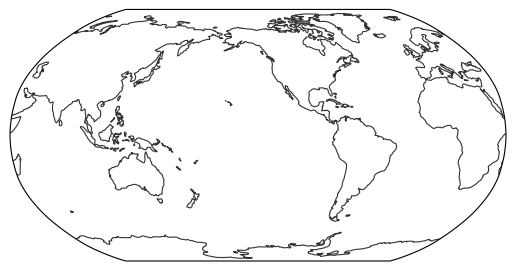

In [89]:
egh.healpix_show(ta_clip.isel(time=0).isel(pressure=5))

#### Masking city data

In [90]:
lat = ta_clip.lat
lon = ta_clip.lon

cell_points = gpd.GeoSeries([Point(lon[i].item(), lat[i].item()) for i in range(len(lat))], crs="EPSG:4326")

#### Centroid, radius, and circle around the city area

In [91]:
# Compute max radius from centroid to boundary
centroid_bne=bne_poly.centroid
boundary_coords = np.array(bne_poly.exterior.coords)
distances_m = [
    geodesic((centroid_bne.y, centroid_bne.x), (lat, lon)).meters
    for lon, lat in boundary_coords  # coords = (lon, lat)
]
radius_m = max(distances_m)
radius_km = radius_m / 1000
center_lat, center_lon = centroid_bne.y, centroid_bne.x


In [92]:
radius_km

33.13785429486232

In [154]:
radius_deg=radius_km/100
radius_deg

0.33137854294862323

### Use radius in degrees

In [159]:
circle_polygon = Polygon([ (radius_deg * np.cos(angle) + geo_centroid[0],
                            radius_deg * np.sin(angle) + geo_centroid[1] )
                            for angle in np.linspace(0, 2 * np.pi, 150)]) 

region_mask = cell_points.within(circle_polygon)
cell_mask_region = xr.DataArray(region_mask.values, dims=["cell"])

In [160]:
city_polygon = Polygon([ (boundary_coords[i, 0], boundary_coords[i, 1]) for i in range(boundary_coords.shape[0])])

city_mask = cell_points.within(city_polygon)
cell_mask_city = xr.DataArray(city_mask.values, dims=["cell"])

ta_region = ta_clip.where(cell_mask_region)  # masking cicular region

ta_city = ta_region.where(cell_mask_city)  # masking city
ta_outside = ta_region.where(~cell_mask_city)  # masking outside city

ValueError: nside must be a positive integer 1 <= nside <= 2^29

<Figure size 640x480 with 0 Axes>

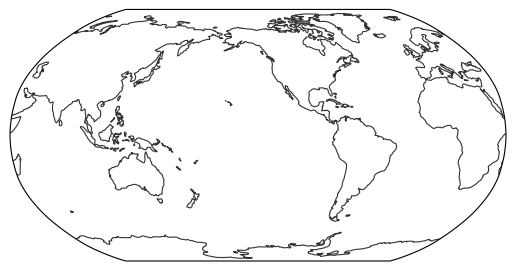

In [157]:
egh.healpix_show(ta_city[0])#.values)

In [158]:
bne_boundary = ShapelyFeature([bne_geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linestyle='-', linewidth=0.5)


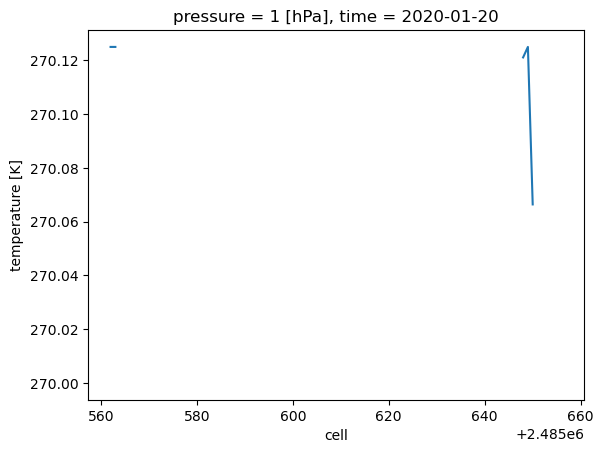

In [98]:
ta_city[0,0].plot()#.lat

TypeError: Input z must be 2D, not 1D

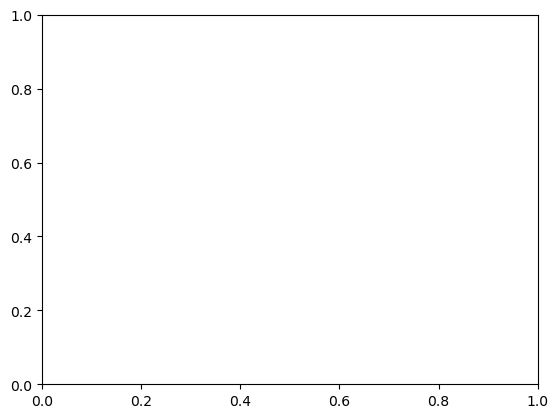

In [50]:
plt.contourf(ta_city.lon, ta_city.lat, ta_city[0,-1]-273.15, cmap='YlOrRd', 
               levels=None, extend='both', transform=ccrs.PlateCarree())


In [63]:
ta_clip.isel(time=10).isel(pressure=4).values

array([215.61436, 215.5588 , 215.5039 , 215.50806, 215.42001, 215.48047,
       215.5    , 215.47906, 215.57523, 215.59372, 215.61328, 215.625  ,
       215.9412 , 215.875  , 215.96446, 216.05545,       nan, 216.08862,
             nan, 216.01172, 216.04872,       nan,       nan,       nan,
       215.77246, 215.71593, 215.7461 , 215.85547, 215.91591, 215.76172,
       215.79872, 215.625  , 215.65889, 215.61592, 215.55081, 215.64558,
       215.70703, 215.61328, 215.61444, 215.95312, 215.97215, 215.82762,
       215.84174, 216.00769, 216.03168, 215.87543, 215.89453, 215.74408,
       215.75   , 215.63672, 215.64621, 215.79758, 215.86887, 215.75   ,
             nan,       nan, 215.98828,       nan, 215.9332 , 216.08704,
       215.9514 , 216.08766,       nan, 216.23306,       nan, 215.50105,
       215.5    , 215.5    , 215.5    , 215.50189, 215.51591, 215.5    ,
       215.51953, 215.51361, 215.51158, 215.60431, 215.625  , 215.5039 ,
       215.5    , 215.55367, 215.5039 , 215.60938, 

ValueError: nside must be a positive integer 1 <= nside <= 2^29

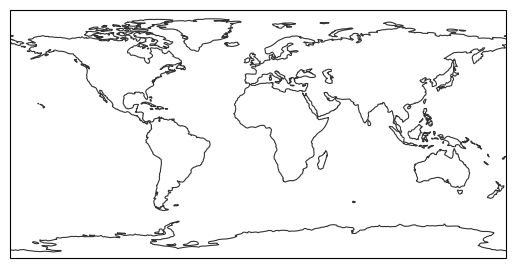

In [60]:
projection=ccrs.PlateCarree(central_longitude=0.0)

ax = egh.create_geoaxis(add_coastlines=True,projection=projection)
im = egh.healpix_show(ta_clip.isel(time=10).isel(pressure=4), ax=ax, add_coastlines=True)


ValueError: nside must be a positive integer 1 <= nside <= 2^29

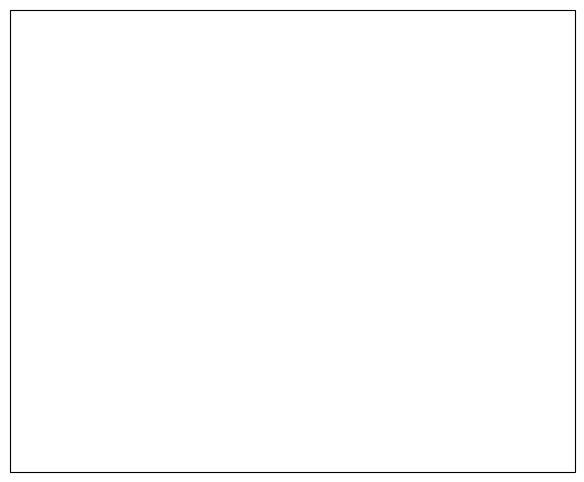

In [38]:
projection=ccrs.PlateCarree(central_longitude=110)
fig,ax=plt.subplots(1,1,figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([105, 160,-50, -5], crs=ccrs.PlateCarree())
im = egh.healpix_show(ta_city.isel(time=10).isel(pressure=4),ax=ax)
# ax.coastlines()
# ax.set_title(f'UM N2560 RAL3 healpix zoom = {name}')
# ax.gridlines(draw_labels=True)

# ax = egh.create_geoaxis(add_coastlines=True,projection=projection)
# ax.coastlines(linewidth=0.2)
# ax.add_feature(states_provinces, linewidth=0.1)
# ax.add_feature(cf.OCEAN, facecolor='lightgray')
# bne_boundary = ShapelyFeature([bne_geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linestyle='-', linewidth=0.5)
# ax.add_feature(bne_boundary)
# ax.set_extent([152,154, -28, -27], ccrs.PlateCarree())
# gl=ax.gridlines(alpha=0.1, draw_labels=True, color='gray')
# gl.top_labels = False
# gl.right_labels = False

# #
# im = egh.healpix_show(ta_city[0,-1].values, ax=ax, add_coastlines=True)
# ax.set_title(f'UM N2560 RAL3 healpix')
# ax.gridlines(draw_labels=True)
# fig=ax.get_figure()
# fig.colorbar(im,orientation='horizontal')

In [161]:
ta_city_dommean=ta_city.mean('cell')
ta_city_dommean#.plot()

<xarray.DataArray 'ta' (time: 3497, pressure: 25)> Size: 350kB
dask.array<mean_agg-aggregate, shape=(3497, 25), dtype=float32, chunksize=(4, 1), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) int64 200B 1 5 10 20 30 50 ... 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 28kB 2020-01-20 ... 2021-04-01

In [100]:
ta_city_dommean_1pm=ta_city_dommean[1:][::8]
ta_city_dommean_1pm.time

<xarray.DataArray 'time' (time: 437)> Size: 3kB
array(['2020-01-20T03:00:00.000000000', '2020-01-21T03:00:00.000000000',
       '2020-01-22T03:00:00.000000000', ..., '2021-03-29T03:00:00.000000000',
       '2021-03-30T03:00:00.000000000', '2021-03-31T03:00:00.000000000'],
      shape=(437,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-20T03:00:00 ... 2021-03-31T03:...

## Creating a buffer area as 3 times the radius
* Based on my ts sensitivity test

In [178]:
rat_buff=2
circle_buff = Polygon([ (rat_buff * radius_deg * np.cos(angle) + geo_centroid[0],
                            rat_buff * radius_deg * np.sin(angle) + geo_centroid[1] )
                            for angle in np.linspace(0, 2 * np.pi, 150)]) 

buffer_mask = cell_points.within(circle_buff)
cell_mask_buffer = xr.DataArray(buffer_mask.values, dims=["cell"])

ta_buff = ta_clip.where(cell_mask_buffer).where(~cell_mask_city)  # masking buffer outside city
ta_buff

<xarray.DataArray 'ta' (time: 3497, pressure: 25, cell: 1352)> Size: 473MB
dask.array<where, shape=(3497, 25, 1352), dtype=float32, chunksize=(4, 1, 1352), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) int64 200B 1 5 10 20 30 50 ... 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 28kB 2020-01-20 ... 2021-04-01
  * cell      (cell) int64 11kB 2483642 2483829 2483830 ... 2573590 2573593
    lat       (cell) float64 11kB -29.66 -29.66 -29.66 ... -25.28 -25.28 -25.28
    lon       (cell) float64 11kB 155.1 154.2 154.1 154.2 ... 151.1 150.9 150.7
Attributes:
    STASH:          [1, 16, 203]
    UM_name:        air_temperature
    grid_mapping:   healpix_nested
    healpix_zoom:   9
    long_name:      temperature
    source:         Data from Met Office Unified Model
    standard_name:  air_temperature
    um_version:     13.5
    units:          K

In [179]:
circle_buff.area

1.3795260700607435

In [163]:
circle_polygon.area

0.3448815175151829

In [162]:
city_polygon.area

0.10885392451209909

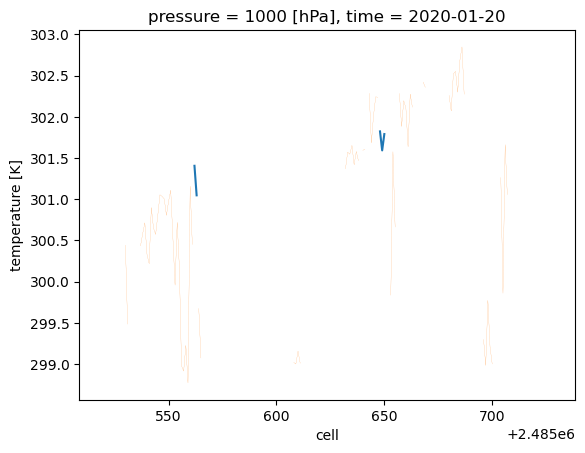

In [169]:
ta_city[0,-1].plot()
ta_buff[0,-1].plot(linewidth=0.1)

In [180]:
ta_buff_dommean=ta_buff.mean('cell')
ta_buff_dommean_1pm=ta_buff_dommean[1:][::8]
ta_buff_dommean_1pm.time

<xarray.DataArray 'time' (time: 437)> Size: 3kB
array(['2020-01-20T03:00:00.000000000', '2020-01-21T03:00:00.000000000',
       '2020-01-22T03:00:00.000000000', ..., '2021-03-29T03:00:00.000000000',
       '2021-03-30T03:00:00.000000000', '2021-03-31T03:00:00.000000000'],
      shape=(437,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-20T03:00:00 ... 2021-03-31T03:...

## Calculating UHI at 1pm from 4D air temperature

In [171]:
uhi_ta_dommean_1pm=ta_city_dommean_1pm-ta_buff_dommean_1pm

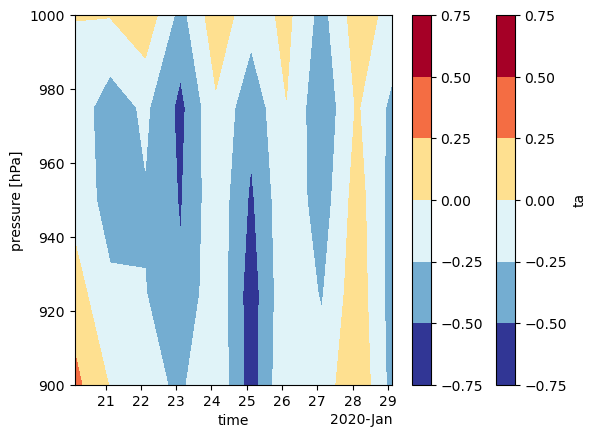

In [173]:
levs=np.arange(-4,4.1,0.5)

cm=uhi_ta_dommean_1pm[:,::-1][:10,:5].plot.contourf(x='time', y='pressure', levels=None,
                                        cmap='RdYlBu_r')
plt.colorbar(cm)

### Plotting UHI(ta) against time and pressure levels

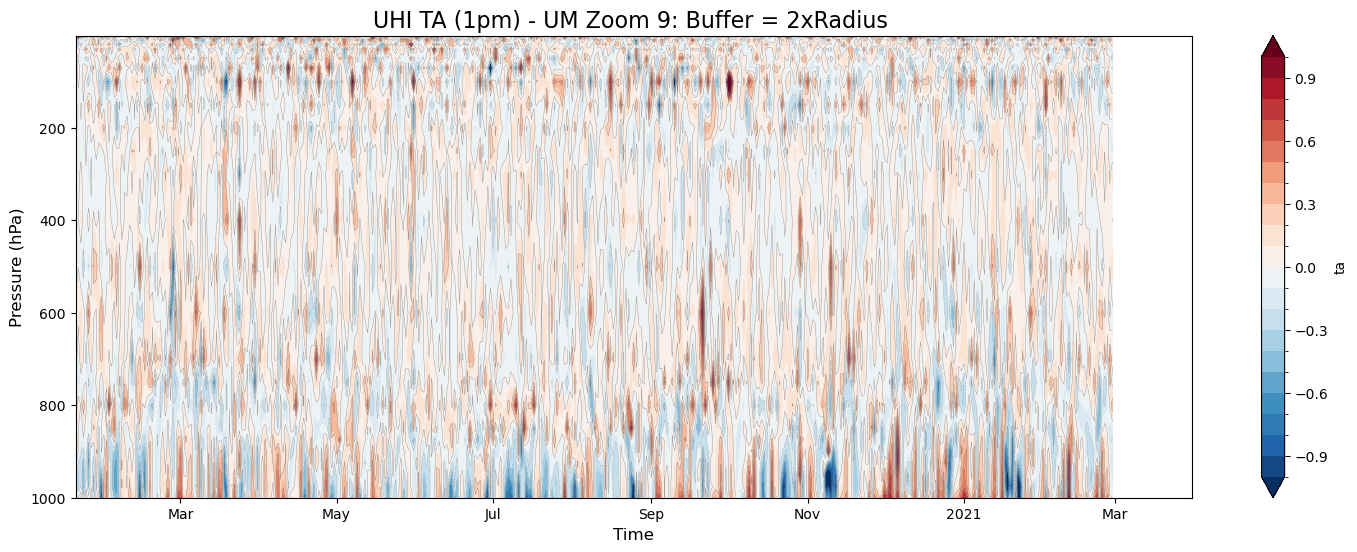

In [181]:
levs=np.arange(-1.,1.1,0.1)
fig, ax = plt.subplots(figsize=(18, 6))

cmap = plt.colormaps['YlOrRd']
cm=uhi_ta_dommean_1pm.plot.contourf(x='time', y='pressure', yincrease=False,
                                           levels=levs, cmap='RdBu_r')
uhi_ta_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
                                           levels=levs[::2], colors='grey', linewidths=0.25)# plt.colorbar(cm, shrink=0.8)
# uhi_ta_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
#                                            levels=[0], colors='k', linewidths=0.5)# plt.colorbar(cm, shrink=0.8)
plt.title('UHI TA (1pm) - UM Zoom 9: Buffer = 2xRadius ', fontsize=16)
plt.ylabel('Pressure (hPa)', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.ylim([ratio_buff_all[0]-0.5,ratio_buff_all[-1]+0.5])
# plt.xlim([uhi_ta_dommean_1pm.time[0].values, uhi_ta_dommean_1pm.time[-1].values])

# plt.grid(True)
os.chdir('%s' %(plot_path))
plt.savefig('UHI_TA_BNE_Pressure.png', dpi=200, bbox_inches='tight')

### Repeating seasonally

In [186]:
def plot_simple_ts(ax, uhi_ta_dommean_1pm, levs, tit):
    cm=uhi_ta_dommean_1pm.plot.contourf(x='time', y='pressure', yincrease=False,
                                               levels=levs, cmap='RdBu_r')
    uhi_ta_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
                                               levels=levs[::2], colors='grey', linewidths=0.25)# plt.colorbar(cm, shrink=0.8)
    plt.title('%s' %(tit), fontsize=16)
    plt.ylabel('Pressure (hPa)', fontsize=12)
    plt.xlabel('Time', fontsize=12)


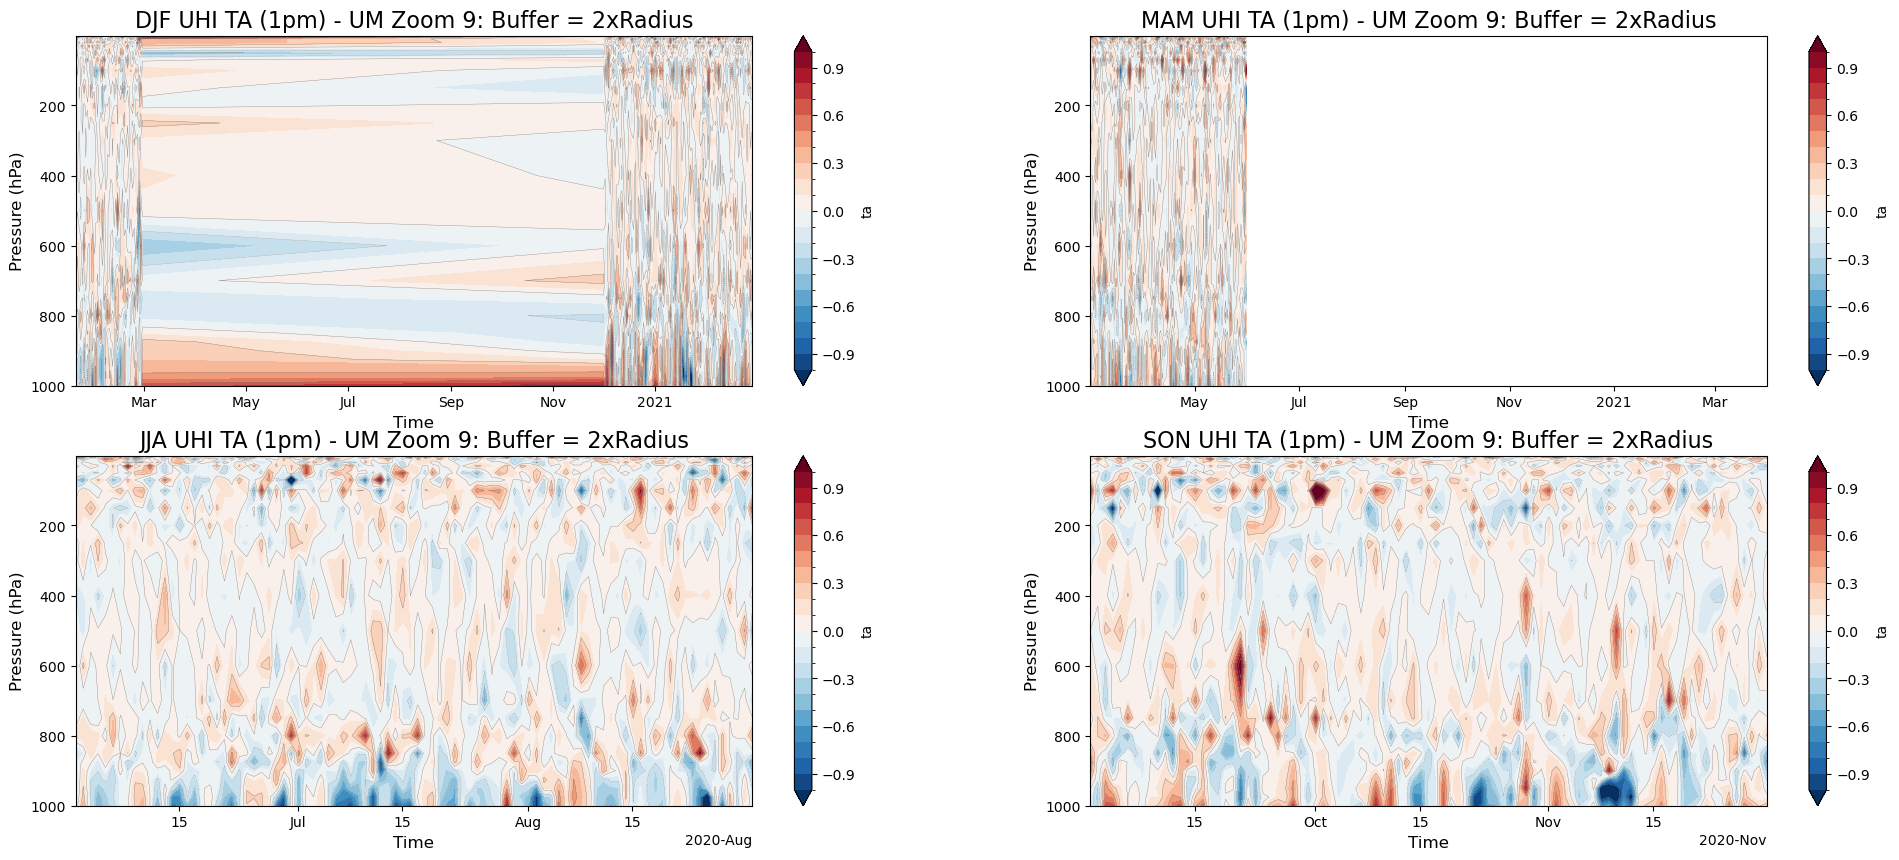

In [188]:
levs=np.arange(-1.,1.1,0.1)
fig = plt.figure(figsize=(24, 10))

cmap = plt.colormaps['YlOrRd']

seas_all=['DJF', 'MAM', 'JJA', 'SON']
for i_seas in np.arange(len(seas_all)): #[:1]:
    ax=plt.subplot(2,2,i_seas+1)
    # djf_data = ds.sel(time=ds.time.dt.season == 'DJF')
    tit=f'{seas_all[i_seas]} UHI TA (1pm) - UM Zoom 9: Buffer = 2xRadius'
    plot_simple_ts(ax, uhi_ta_dommean_1pm.sel(time=uhi_ta_dommean_1pm.time.dt.season == seas_all[i_seas]),
                   levs, tit)

os.chdir('%s' %(plot_path))
plt.savefig('UHI_TA_BNE_Pressure_Seas.png', dpi=200, bbox_inches='tight')

In [140]:
uhi_ta_dommean_1pm[0,-1].values

array(-1.3206482, dtype=float32)

# Worth checking other vars

In [182]:
var='hus'

In [183]:
def uhi_4d(var):
    var=ds[var].where(sftlf>0)
    var_clip = var.where((var.lon > boundary_coords[:, 0].min()-2) & (var.lon < boundary_coords[:, 0].max()+2) \
                             & (var.lat > boundary_coords[:, 1].min()-2) & (var.lat < boundary_coords[:, 1].max()+2), drop=True )
    var_city = var_clip.where(cell_mask_city)  # masking city
    var_buff = var_clip.where(cell_mask_buffer).where(~cell_mask_city)  # masking buffer outside city
    
    var_city_dommean=var_city.mean('cell')
    var_city_dommean_1pm=var_city_dommean[1:][::8]
    var_buff_dommean=var_buff.mean('cell')
    var_buff_dommean_1pm=var_buff_dommean[1:][::8]
    uhi_var_dommean_1pm=var_city_dommean_1pm-var_buff_dommean_1pm

    return uhi_var_dommean_1pm

In [184]:
uhi_hus_dommean_1pm=uhi_4d(var)

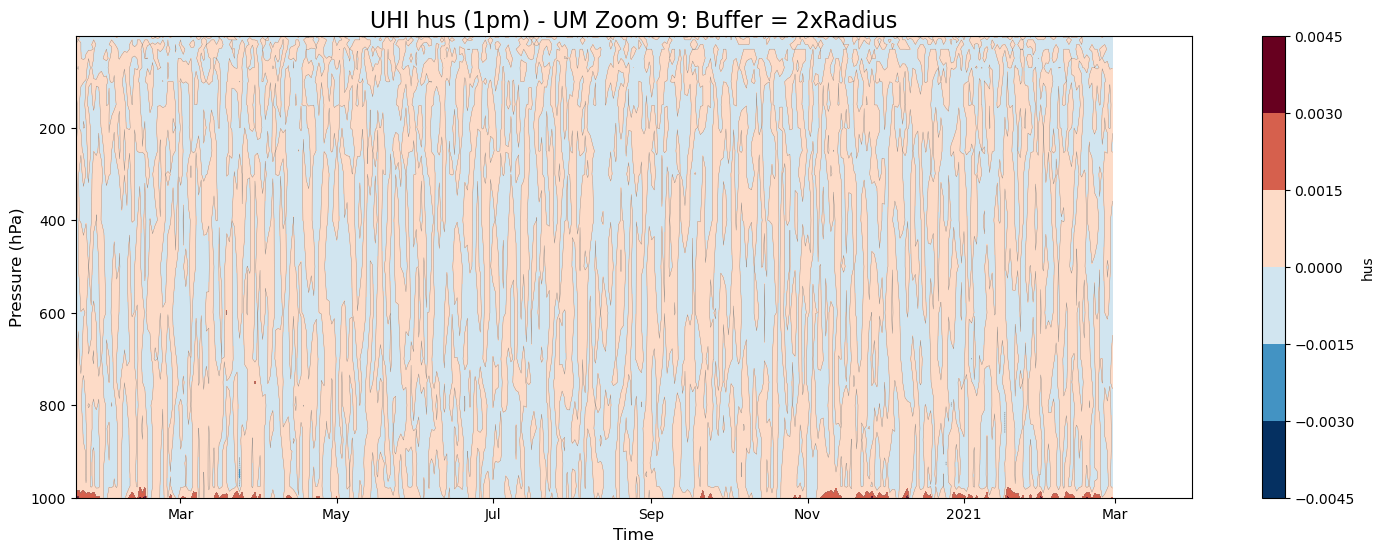

In [189]:
levs=None #np.arange(-1.,1.1,0.1)
fig, ax = plt.subplots(figsize=(18, 6))

cmap = plt.colormaps['YlOrRd']
cm=uhi_hus_dommean_1pm.plot.contourf(x='time', y='pressure', yincrease=False,
                                           levels=levs, cmap='RdBu_r')
uhi_hus_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
                                           levels=levs, colors='grey', linewidths=0.25)# plt.colorbar(cm, shrink=0.8)
# uhi_ta_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
#                                            levels=[0], colors='k', linewidths=0.5)# plt.colorbar(cm, shrink=0.8)
plt.title('UHI %s (1pm) - UM Zoom 9: Buffer = 2xRadius' %(var), fontsize=16)
plt.ylabel('Pressure (hPa)', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.ylim([ratio_buff_all[0]-0.5,ratio_buff_all[-1]+0.5])
# plt.xlim([uhi_ta_dommean_1pm.time[0].values, uhi_ta_dommean_1pm.time[-1].values])

# plt.grid(True)
os.chdir('%s' %(plot_path))
plt.savefig('UHI_%s_BNE_Pressure.png' %(var), dpi=200, bbox_inches='tight')

In [196]:
var='hur'

In [197]:
uhi_var_dommean_1pm=uhi_4d(var)

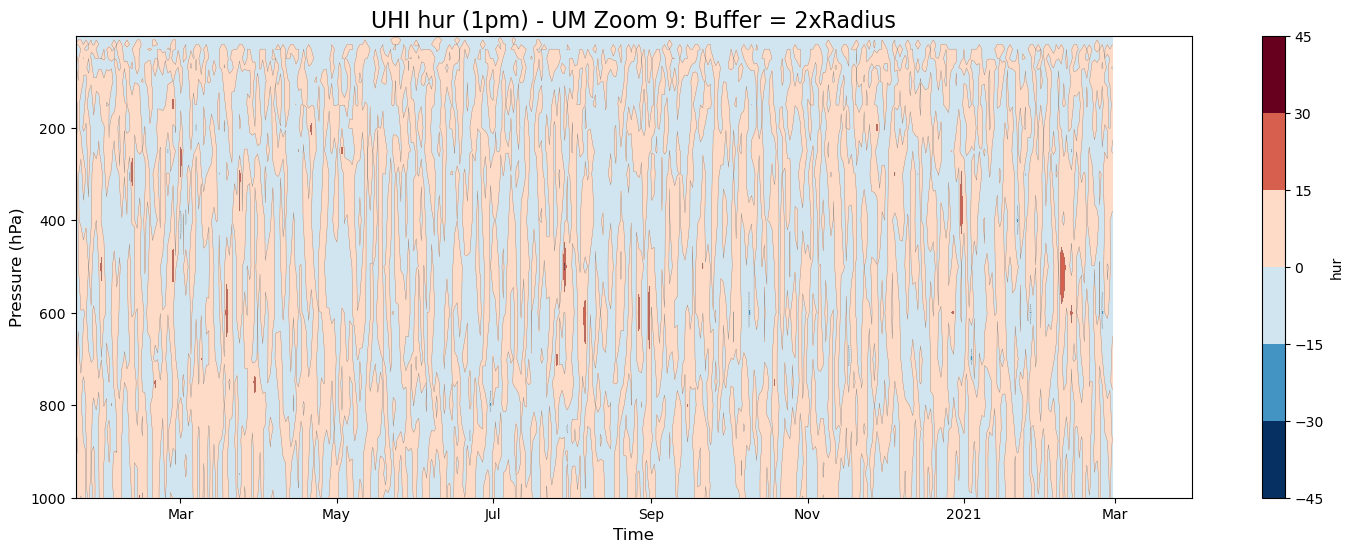

In [198]:
levs=None #np.arange(-1.,1.1,0.1)
fig, ax = plt.subplots(figsize=(18, 6))

cmap = plt.colormaps['YlOrRd']
cm=uhi_var_dommean_1pm.plot.contourf(x='time', y='pressure', yincrease=False,
                                           levels=levs, cmap='RdBu_r')
uhi_var_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
                                           levels=levs, colors='grey', linewidths=0.25)# plt.colorbar(cm, shrink=0.8)
# uhi_ta_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
#                                            levels=[0], colors='k', linewidths=0.5)# plt.colorbar(cm, shrink=0.8)
plt.title('UHI %s (1pm) - UM Zoom 9: Buffer = 2xRadius' %(var), fontsize=16)
plt.ylabel('Pressure (hPa)', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.ylim([ratio_buff_all[0]-0.5,ratio_buff_all[-1]+0.5])
# plt.xlim([uhi_ta_dommean_1pm.time[0].values, uhi_ta_dommean_1pm.time[-1].values])

# plt.grid(True)
os.chdir('%s' %(plot_path))
plt.savefig('UHI_%s_BNE_Pressure.png' %(var), dpi=200, bbox_inches='tight')

In [199]:
var='wa'

In [200]:
uhi_var_dommean_1pm=uhi_4d(var)

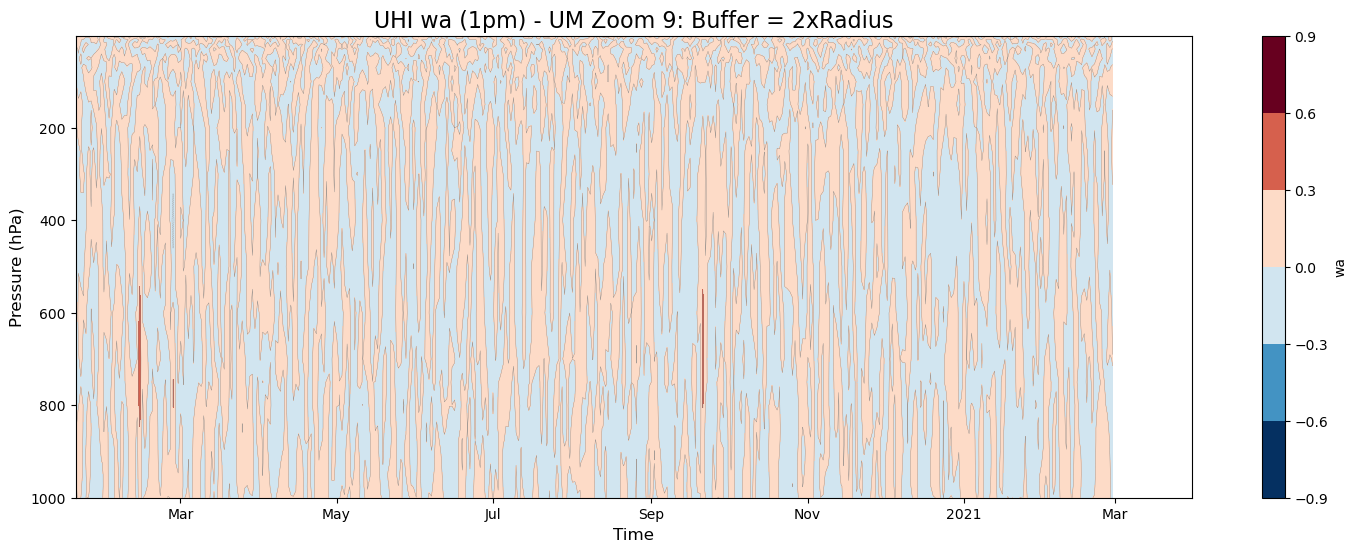

In [201]:
levs=None #np.arange(-1.,1.1,0.1)
fig, ax = plt.subplots(figsize=(18, 6))

cmap = plt.colormaps['YlOrRd']
cm=uhi_var_dommean_1pm.plot.contourf(x='time', y='pressure', yincrease=False,
                                           levels=levs, cmap='RdBu_r')
uhi_var_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
                                           levels=levs, colors='grey', linewidths=0.25)# plt.colorbar(cm, shrink=0.8)
# uhi_ta_dommean_1pm.plot.contour(x='time', y='pressure', yincrease=False,
#                                            levels=[0], colors='k', linewidths=0.5)# plt.colorbar(cm, shrink=0.8)
plt.title('UHI %s (1pm) - UM Zoom 9: Buffer = 2xRadius' %(var), fontsize=16)
plt.ylabel('Pressure (hPa)', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.ylim([ratio_buff_all[0]-0.5,ratio_buff_all[-1]+0.5])
# plt.xlim([uhi_ta_dommean_1pm.time[0].values, uhi_ta_dommean_1pm.time[-1].values])

# plt.grid(True)
os.chdir('%s' %(plot_path))
plt.savefig('UHI_%s_BNE_Pressure.png' %(var), dpi=200, bbox_inches='tight')